# Лабораторная работа №3 "деревья решений, ансамбли решающих деревьев

**Задание**
1. Скачать набор данных в соответствии с вариантом. Проанализировать набор
данных: статистику по переменным, классы, количество объектов, количество
пропущенных значений.
2. Построить и визуализировать дерево решений (ограничить глубину дерева 3
уровнями).
Вычислить метрики качества классификации. Записать найденные правила в виде
логических утверждений.
3. Построить зависимость качества решения (на обучении и скользящем контроле)
от числа вершин дерева. Исследовать влияние критерия, по которому
выполняется разбиение узлов дерева.
4. Применить метод градиентного бустинга. Вывести список построенных
деревьев (первые 3). Вычислить значимость переменных. Построить зависимость
качества решения (на обучении и скользящем контроле) от числа деревьев.
5. Применить метод случайного леса. Вычислить значимость переменных.
Построить зависимость качества решения (на обучении и скользящем контроле)
от числа деревьев.

**аритмия** 
# Первый пункт

In [1]:
import numpy as np
import pandas as pd 

In [2]:
data = pd.read_csv('MIT-BIH Arrhythmia Database.csv')
data

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,...,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,...,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,...,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,...,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

In [4]:
data.describe()

,record,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,...,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000
mean,173.730984,279.400947,278.588207,0.049772,0.372262,1.054485,-0.134376,-0.090466,28.326858,10.972817,...,-0.321359,11.212347,10.487163,36.112922,14.413412,-0.321359,-0.317836,-0.308809,-0.294919,-0.366798
std,51.673158,81.915453,81.124963,0.168789,0.739879,0.617508,1.027590,0.189436,15.027789,9.468930,...,0.447444,12.043096,8.799687,17.419760,9.118872,0.447444,0.456949,0.518043,0.593426,0.584913
min,100.000000,11.000000,6.000000,-3.094391,-2.006422,-2.372835,-3.622550,-3.871359,0.000000,1.000000,...,-5.481982,0.000000,1.000000,5.000000,1.000000,-5.481982,-4.493784,-4.398122,-4.069726,-4.520327
25%,115.000000,230.000000,230.000000,-0.054749,-0.249060,0.754047,-0.781784,-0.133274,18.000000,5.000000,...,-0.529435,3.000000,5.000000,25.000000,10.000000,-0.529435,-0.537288,-0.603469,-0.622269,-0.673902
50%,203.000000,267.000000,266.000000,0.015865,0.240303,1.105142,-0.516340,-0.069539,27.000000,7.000000,...,-0.111843,7.000000,8.000000,33.000000,12.000000,-0.111843,-0.115650,-0.151890,-0.196801,-0.262222
75%,219.000000,324.000000,322.000000,0.125809,0.928176,1.424135,0.857247,-0.014636,38.000000,16.000000,...,-0.028438,18.000000,13.000000,45.000000,17.000000,-0.028438,-0.016348,0.016088,0.040575,-0.052769
max,234.000000,2114.000000,2114.000000,3.821118,4.118327,4.018918,4.018918,3.080710,170.000000,150.000000,...,4.033554,260.000000,185.000000,412.000000,215.000000,4.033554,3.585718,2.691557,3.755566,2.869186


In [5]:
data['type'].describe()

count     100689
unique         5
top            N
freq       90083
Name: type, dtype: object

In [6]:
cls = data['type'].unique()
cls

array(['N', 'Q', 'SVEB', 'VEB', 'F'], dtype=object)

In [7]:
patients = data['record'].unique()
print(patients, '\nCapacity = ', patients.shape[0])

[101 106 108 109 112 114 115 116 118 119 122 124 201 203 205 207 208 209
 215 220 223 230 100 103 105 111 113 117 121 123 200 202 210 212 213 214
 219 221 222 228 231 232 233 234] 
Capacity =  44


In [8]:
features = data.drop('type',axis=1).columns

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

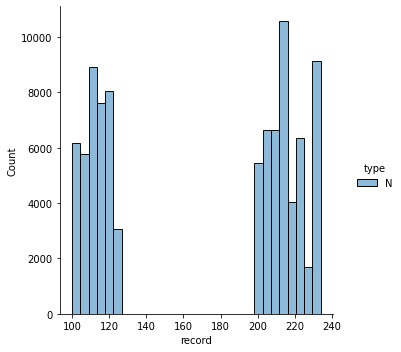

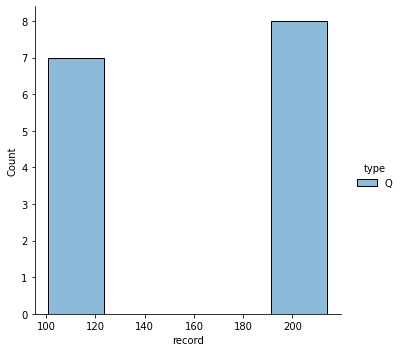

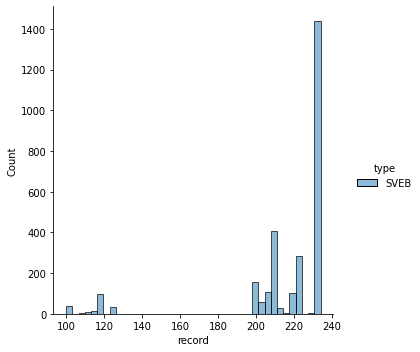

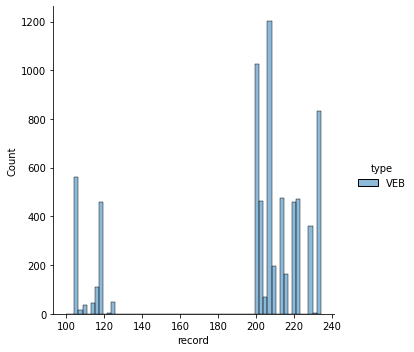

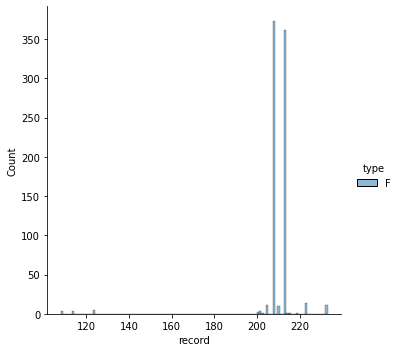

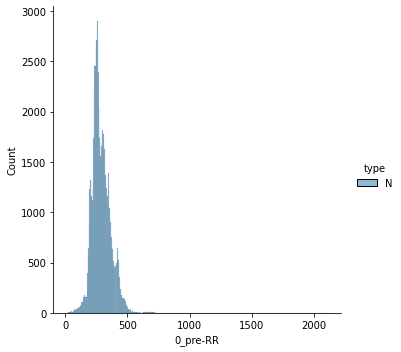

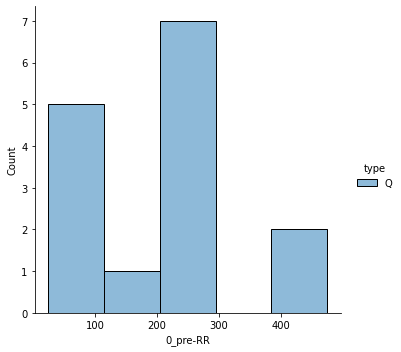

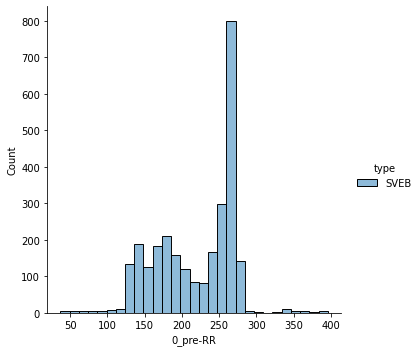

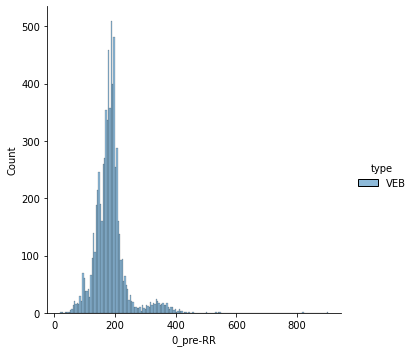

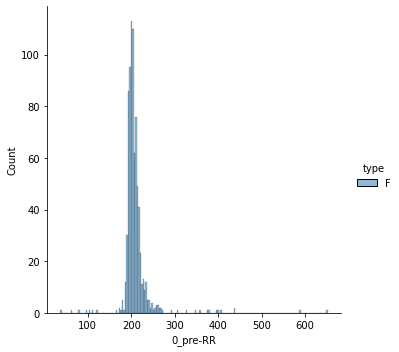

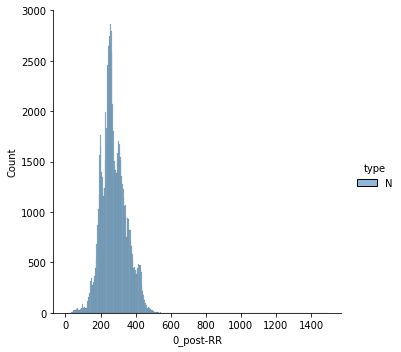

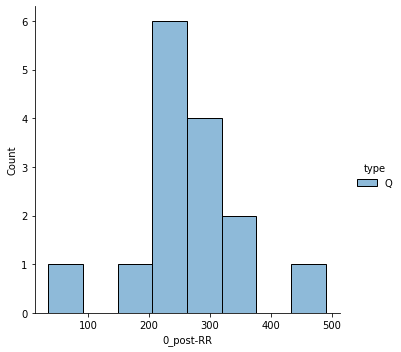

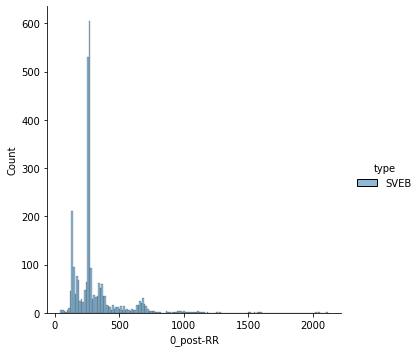

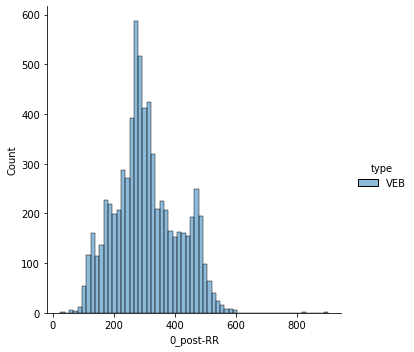

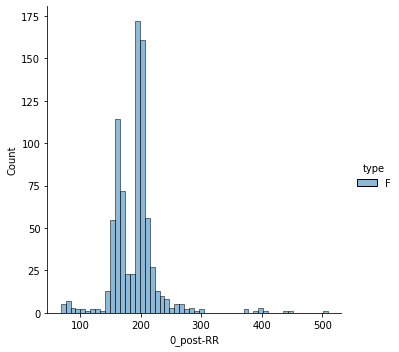

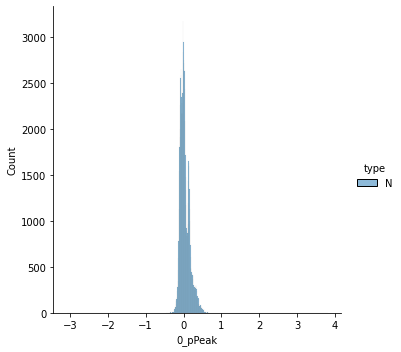

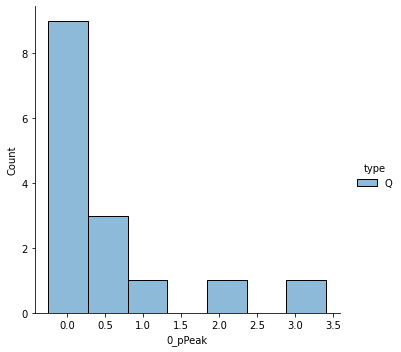

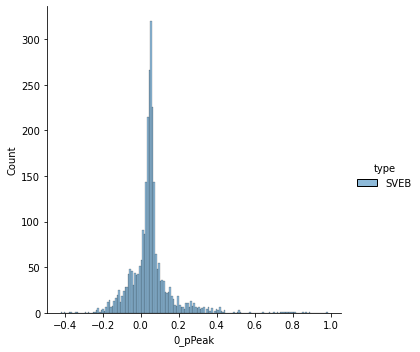

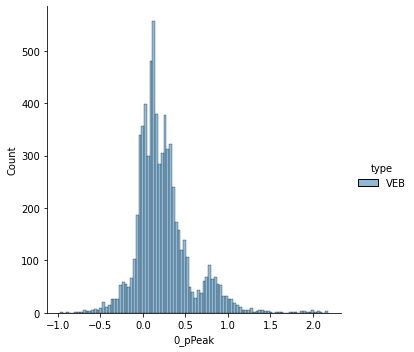

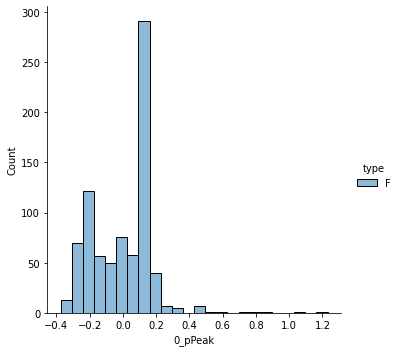

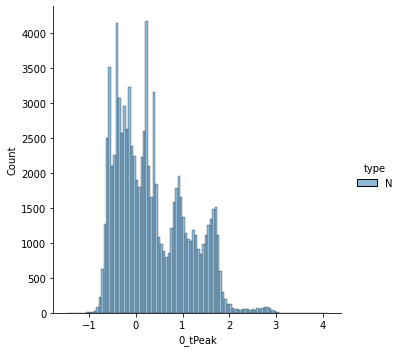

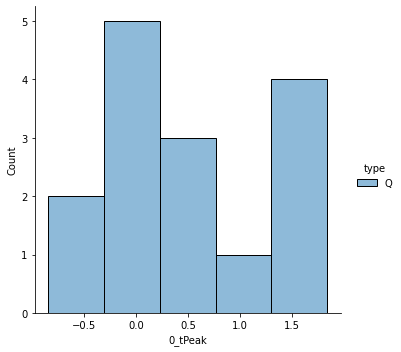

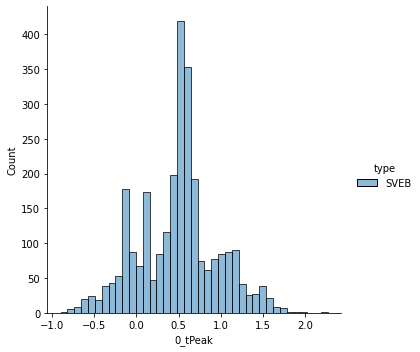

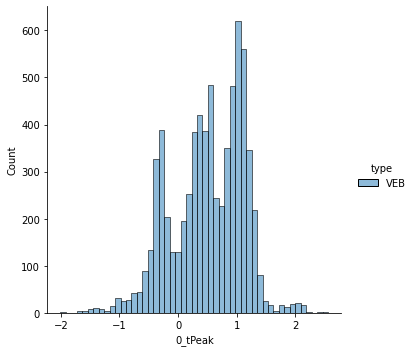

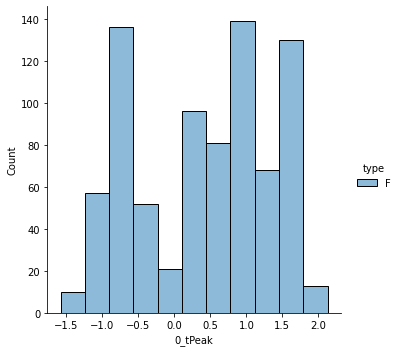

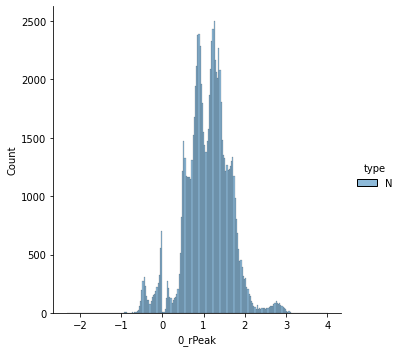

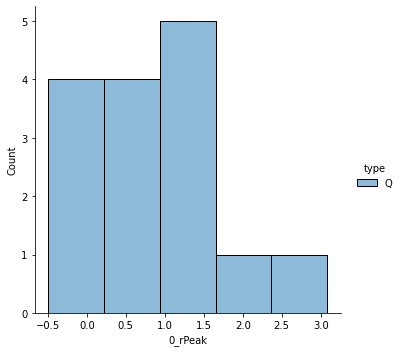

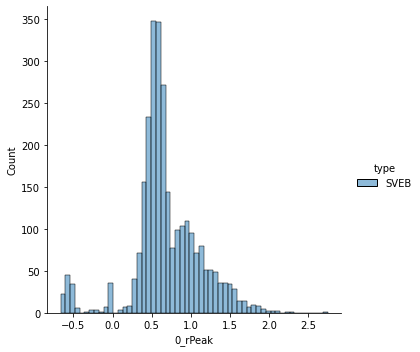

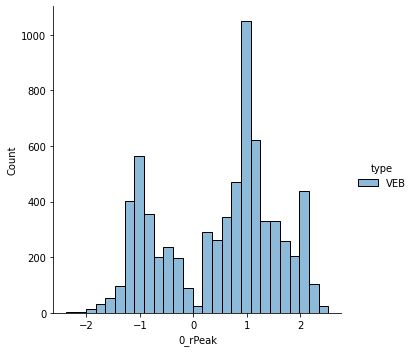

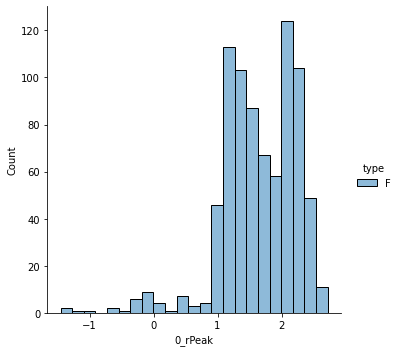

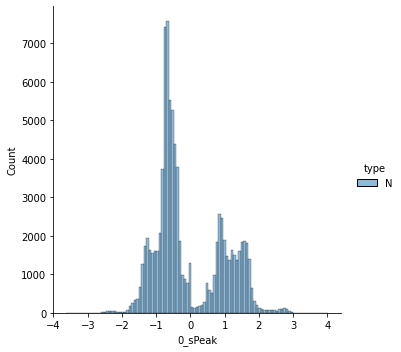

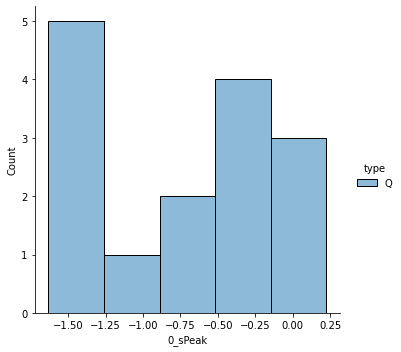

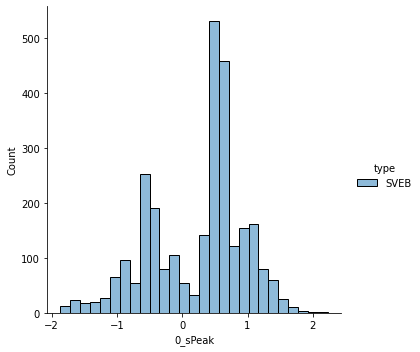

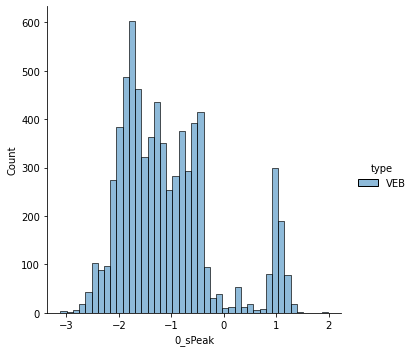

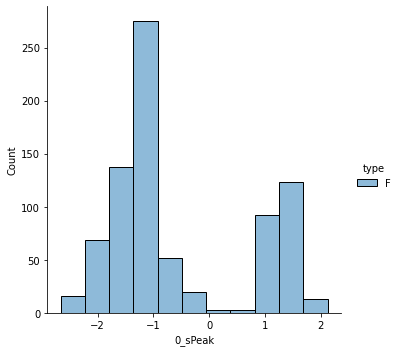

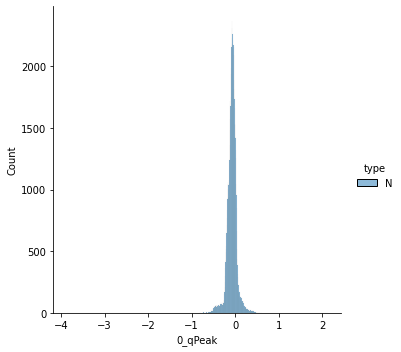

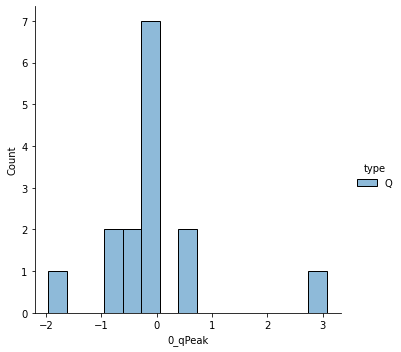

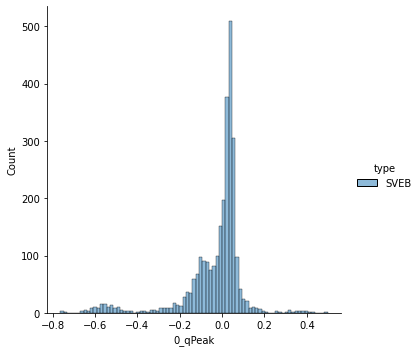

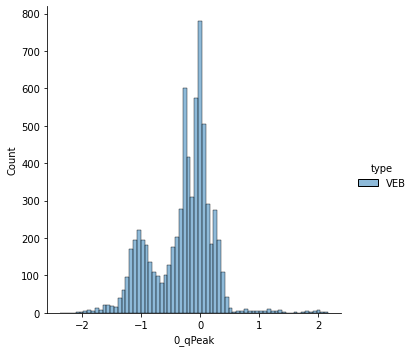

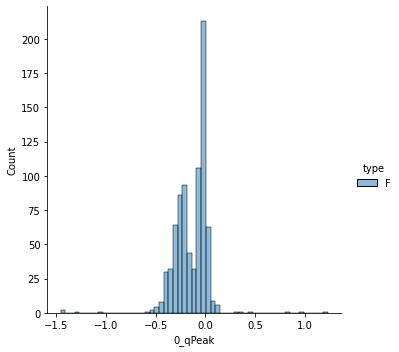

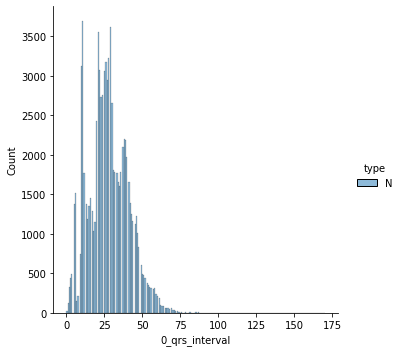

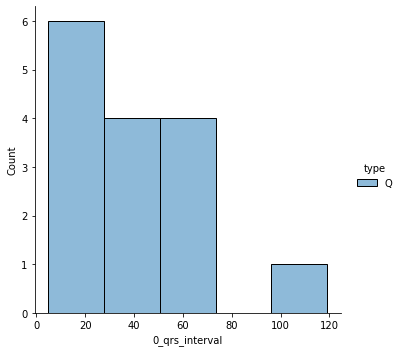

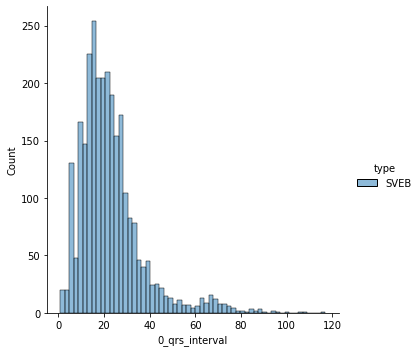

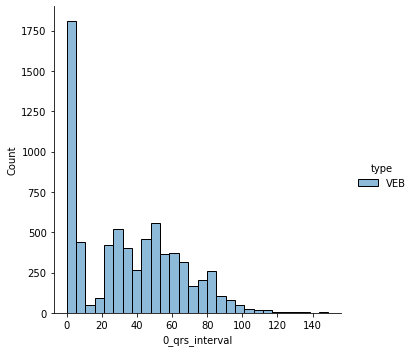

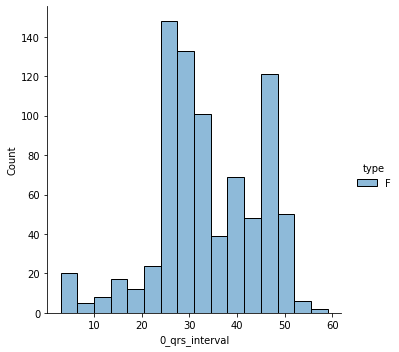

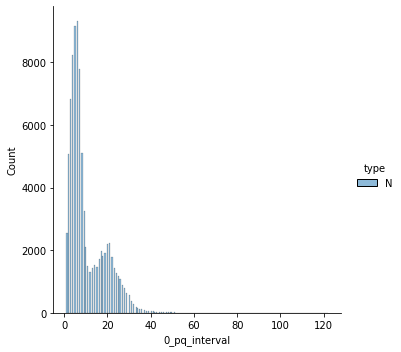

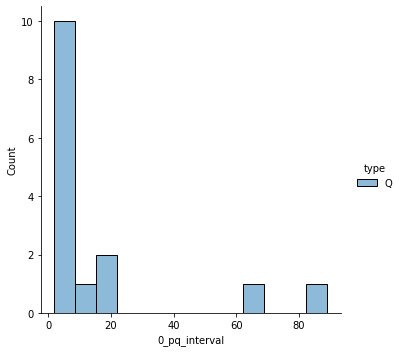

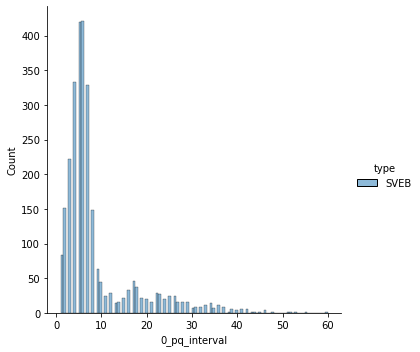

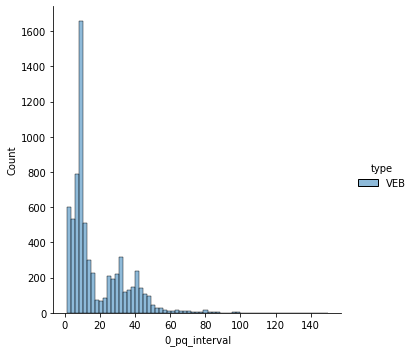

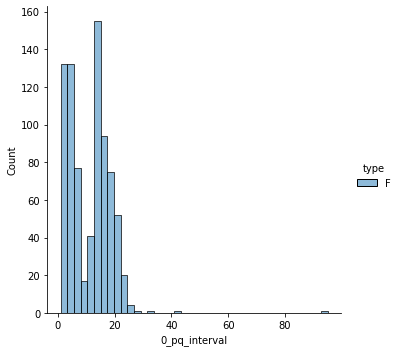

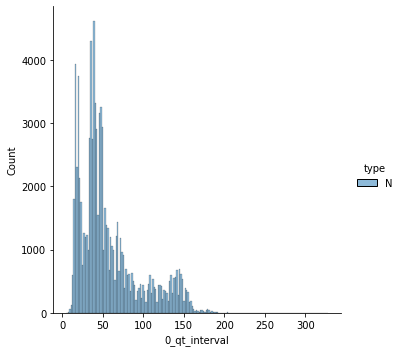

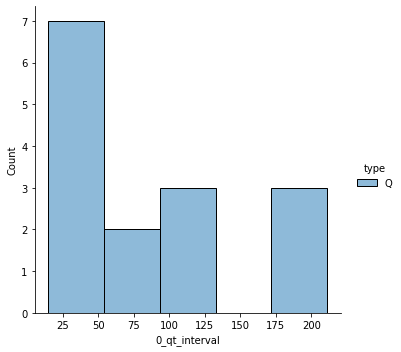

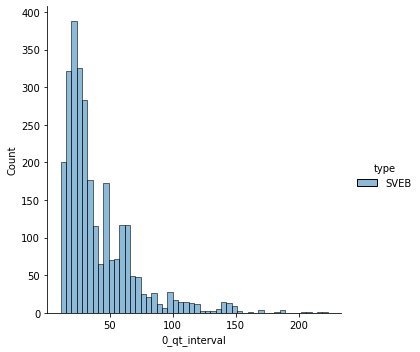

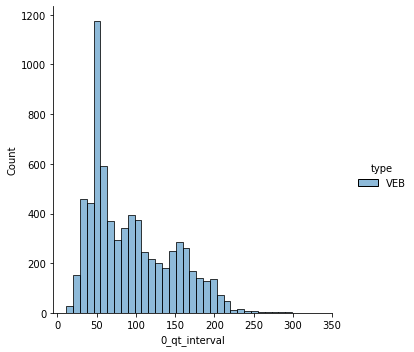

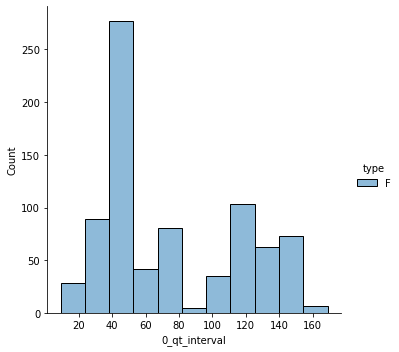

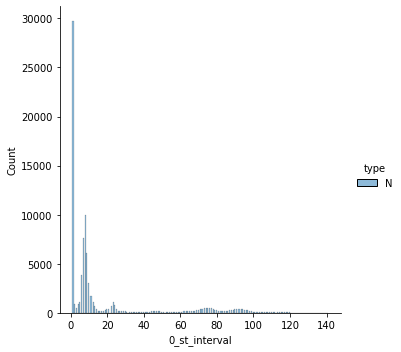

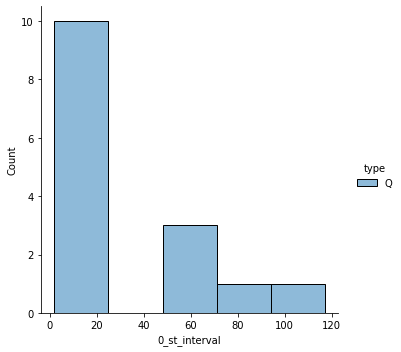

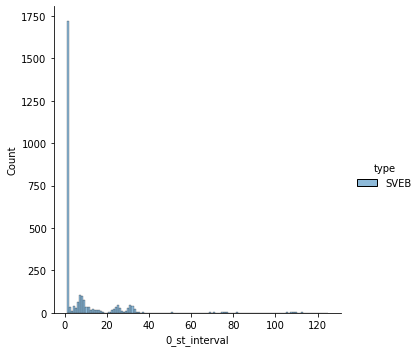

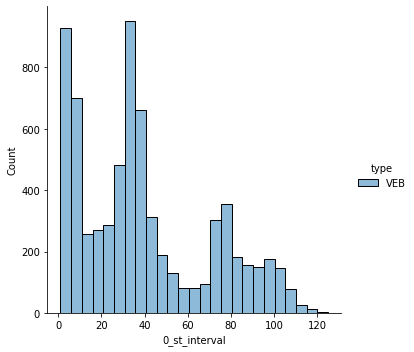

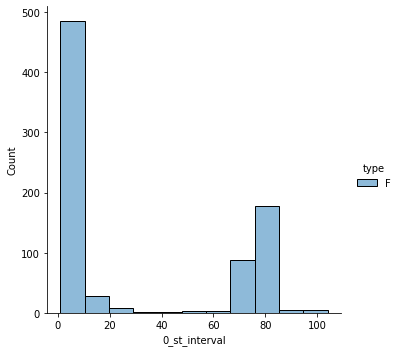

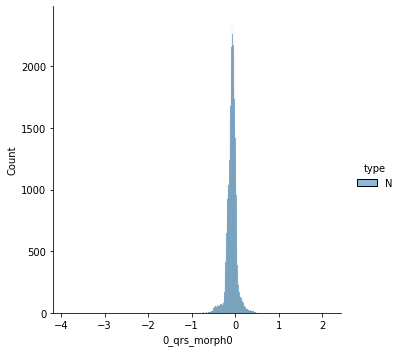

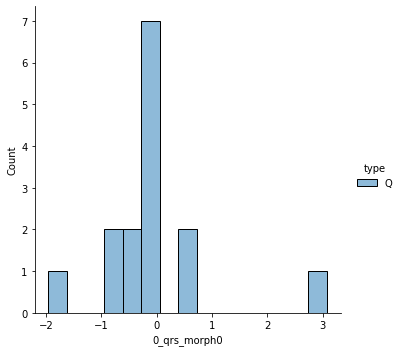

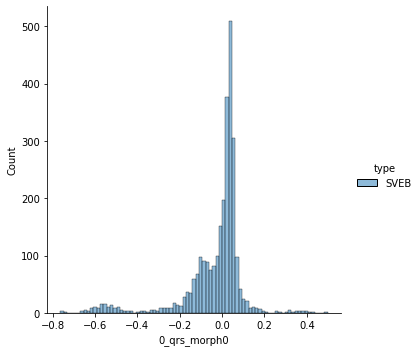

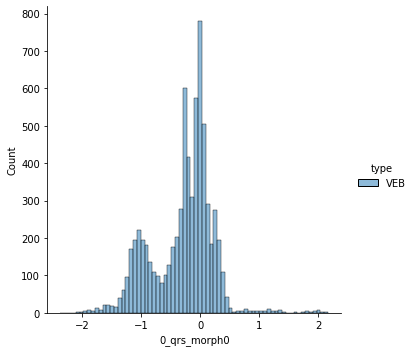

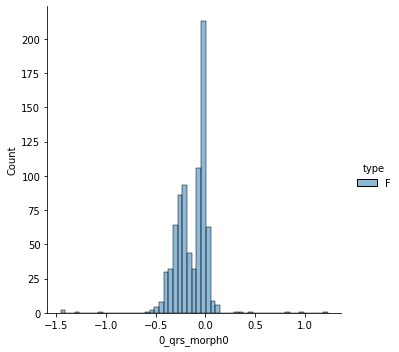

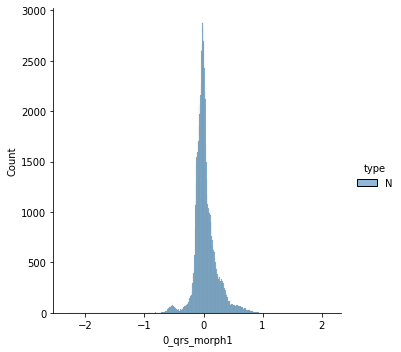

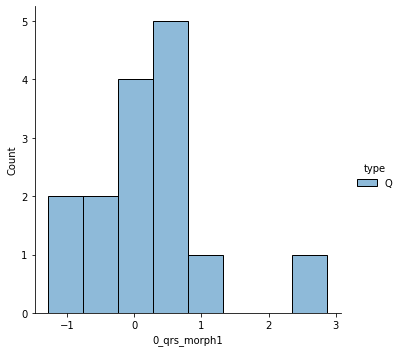

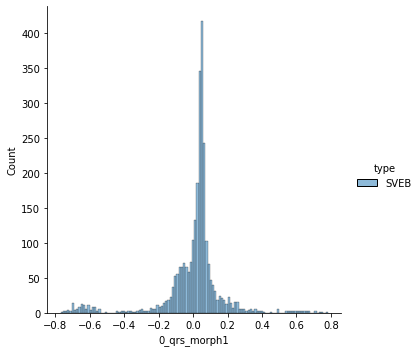

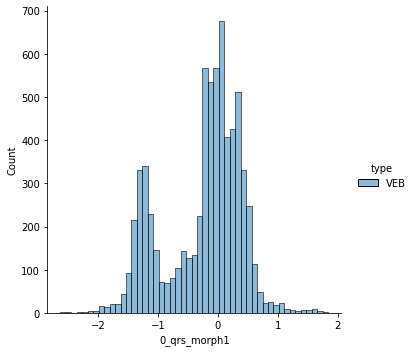

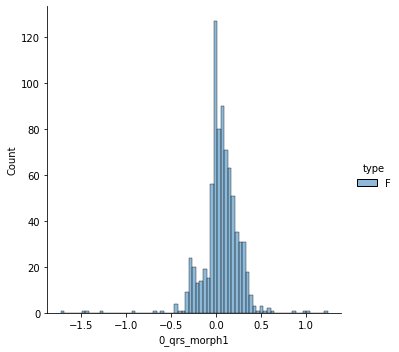

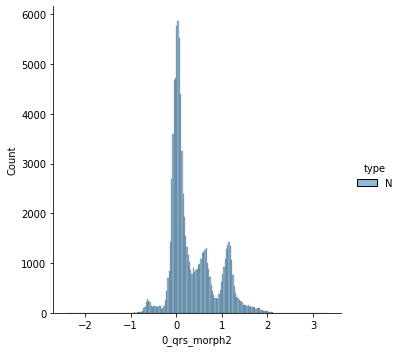

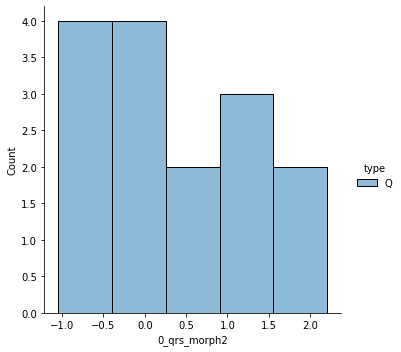

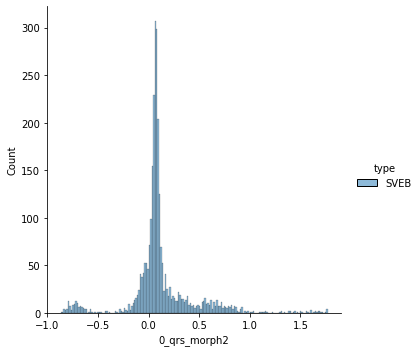

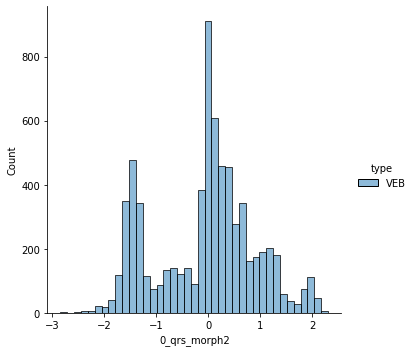

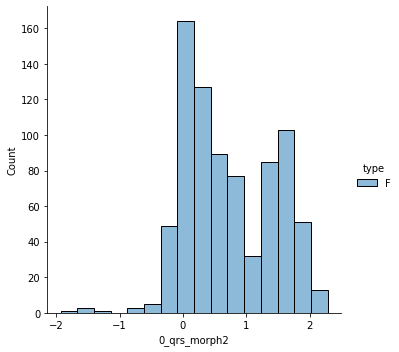

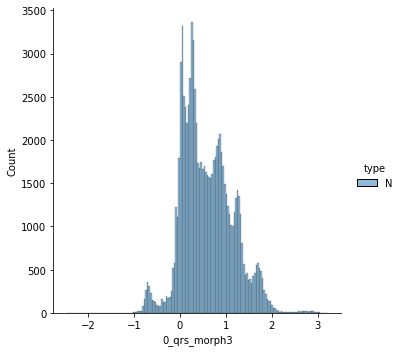

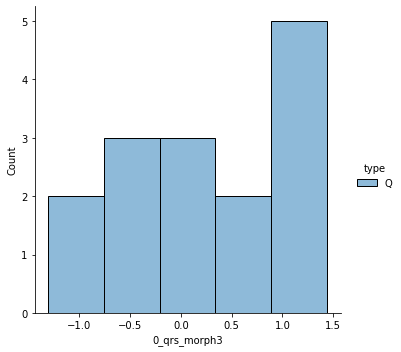

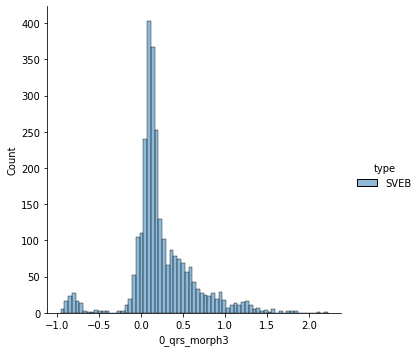

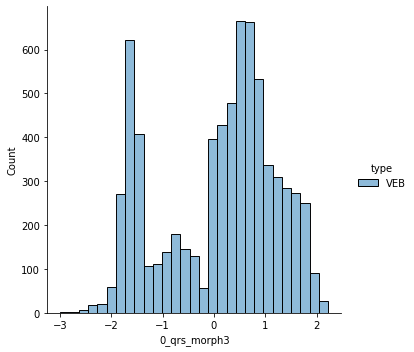

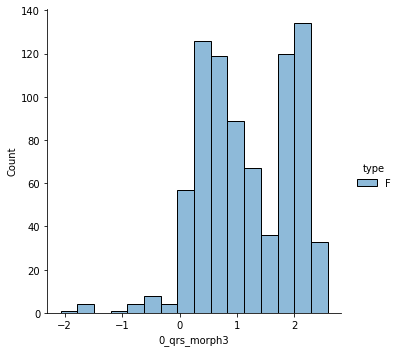

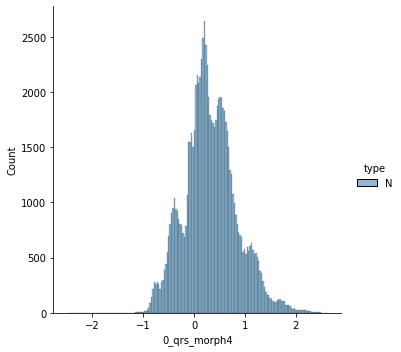

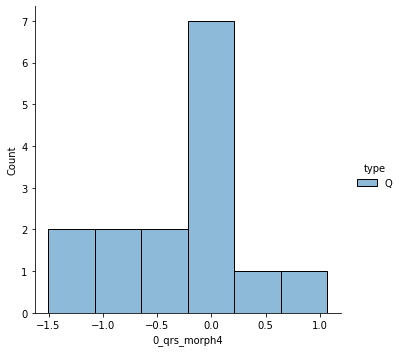

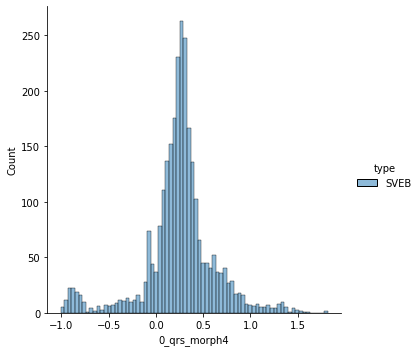

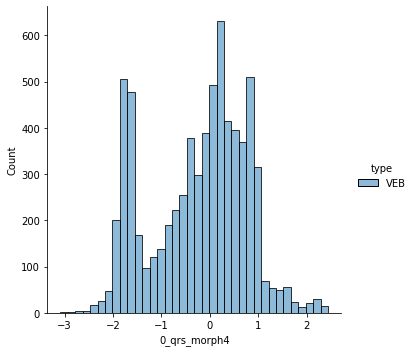

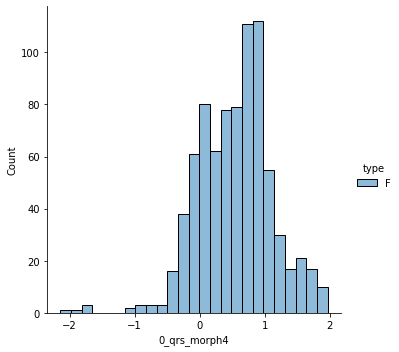

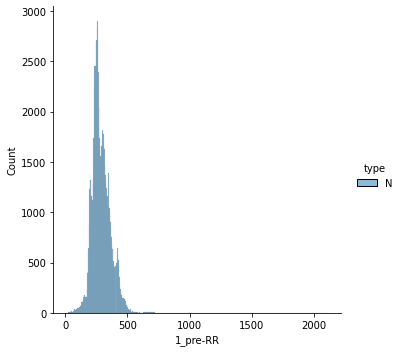

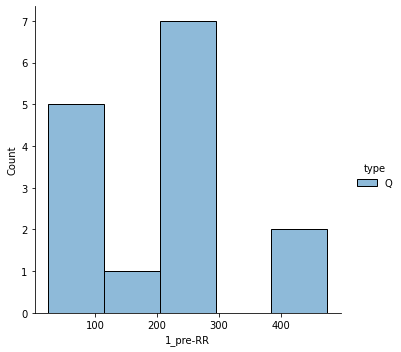

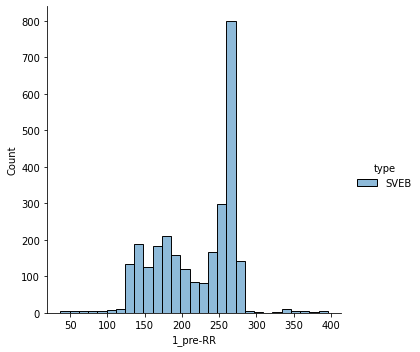

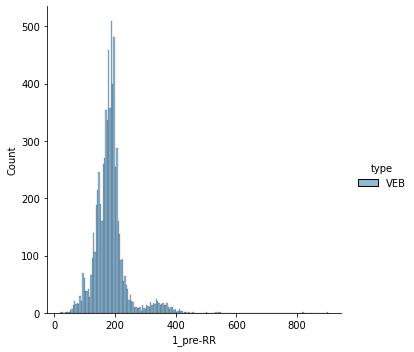

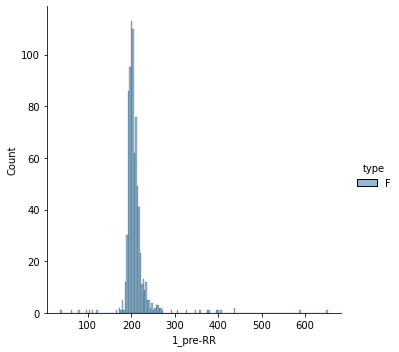

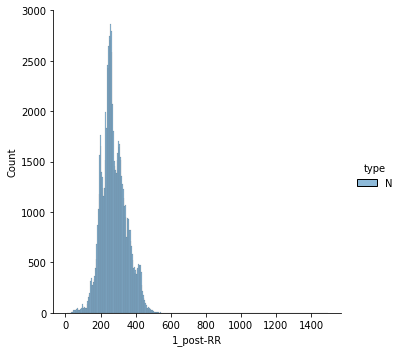

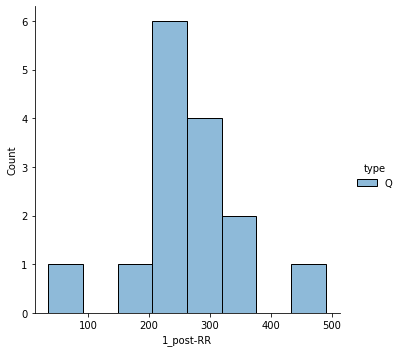

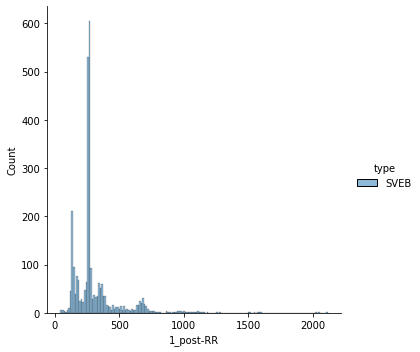

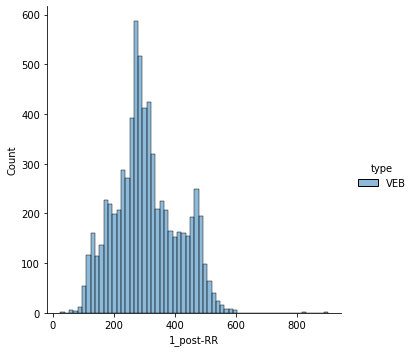

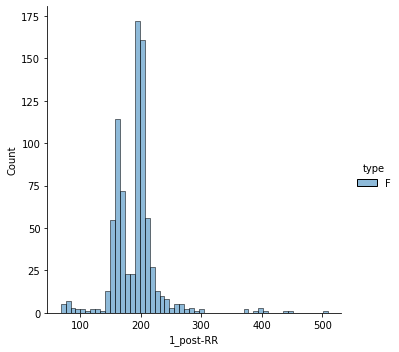

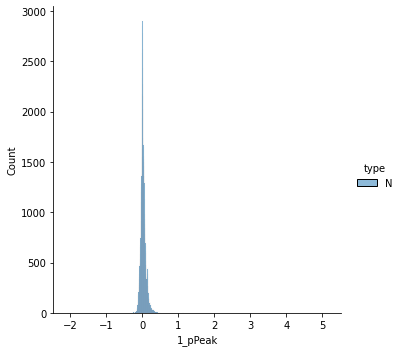

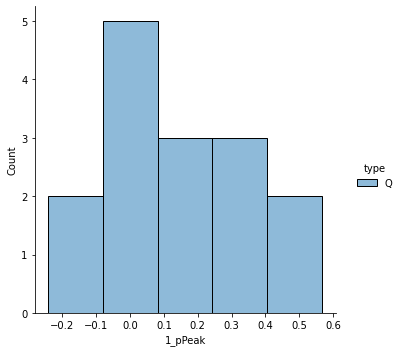

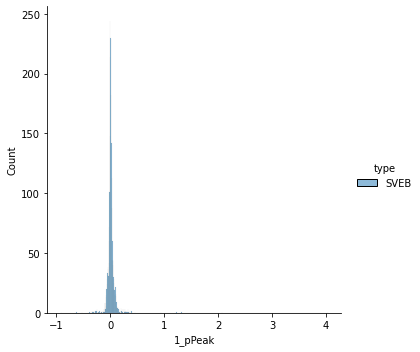

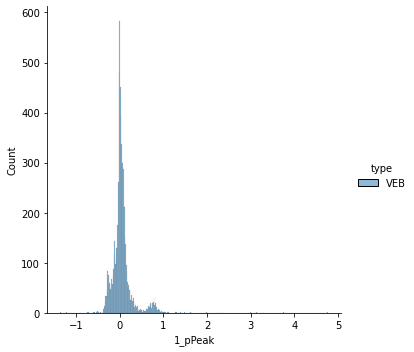

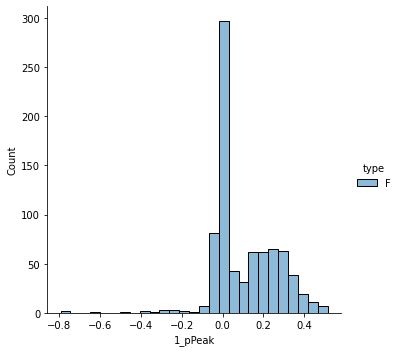

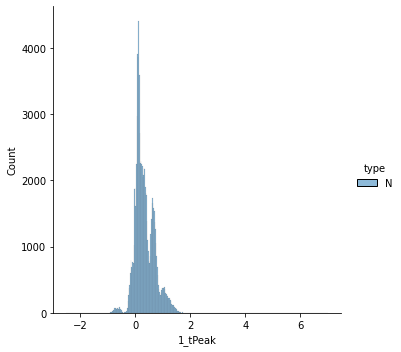

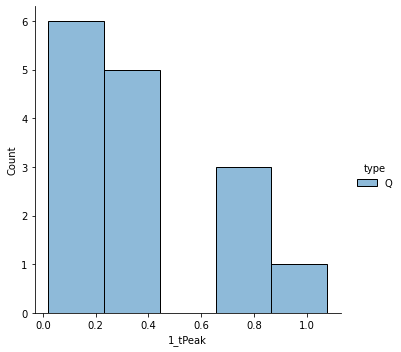

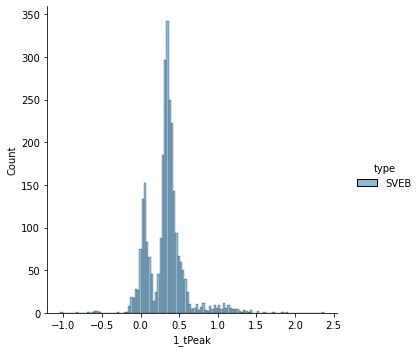

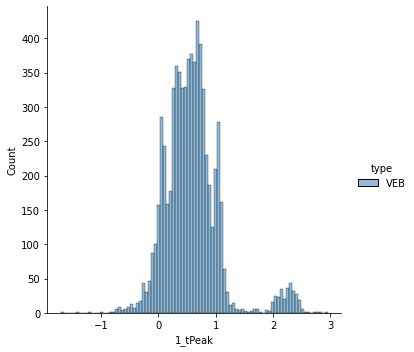

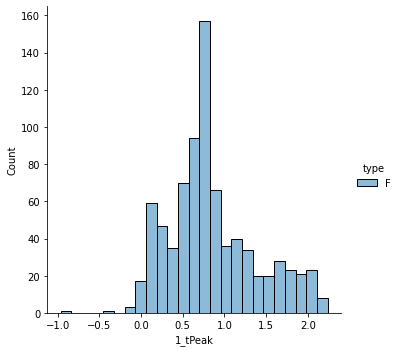

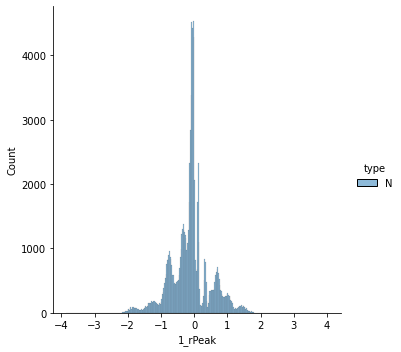

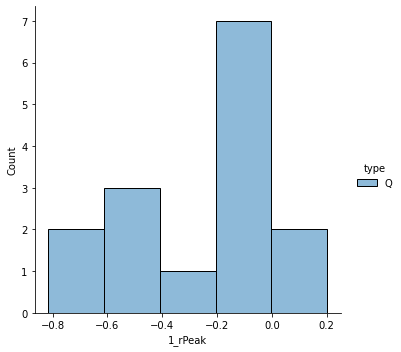

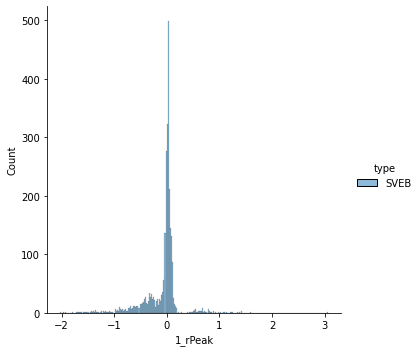

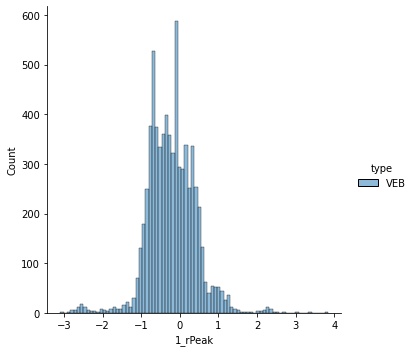

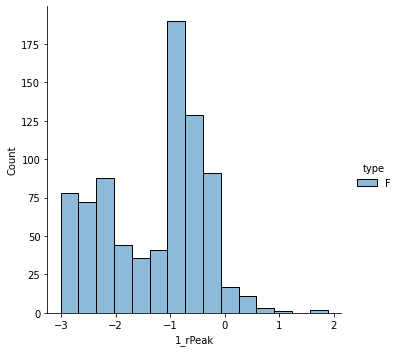

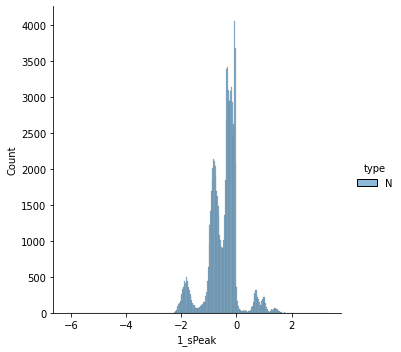

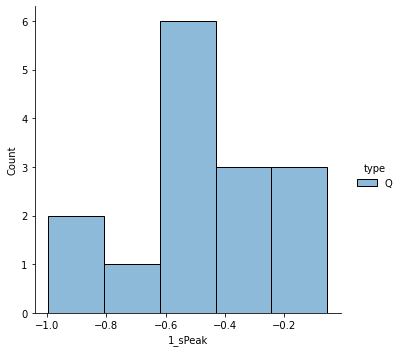

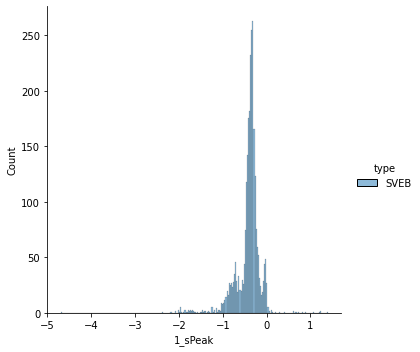

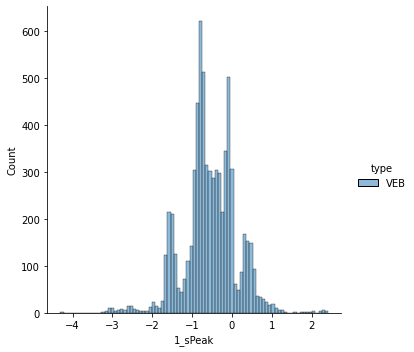

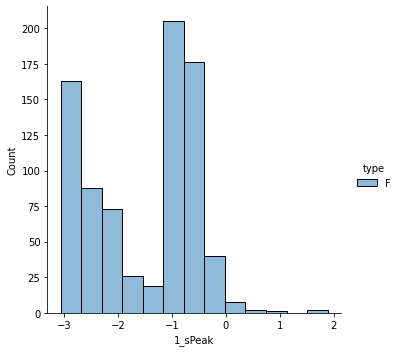

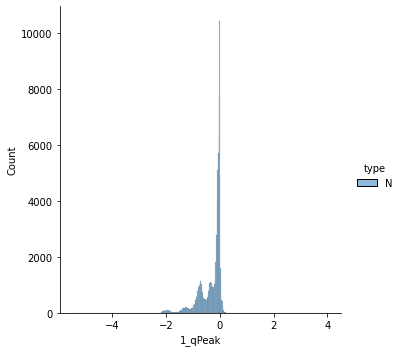

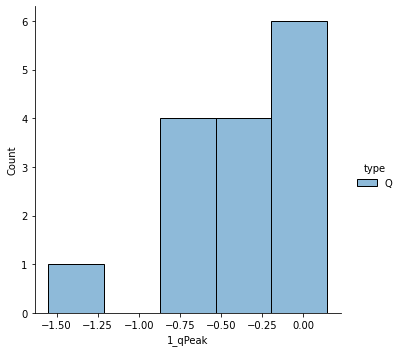

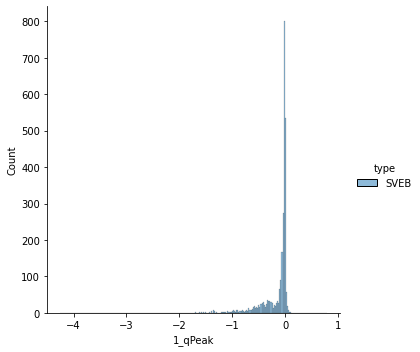

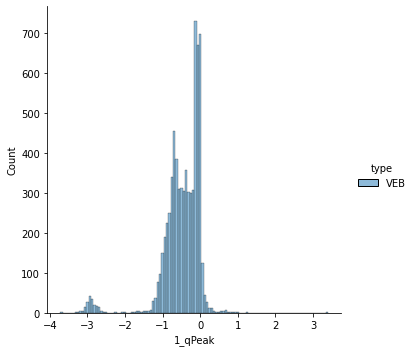

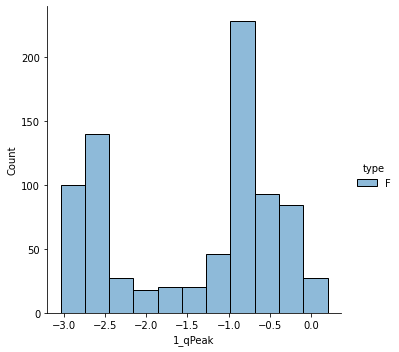

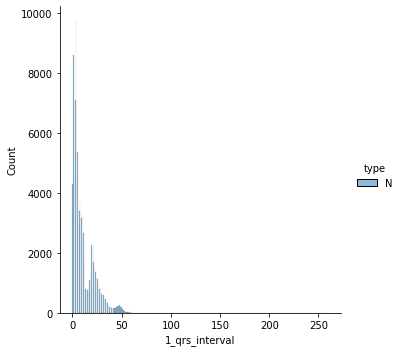

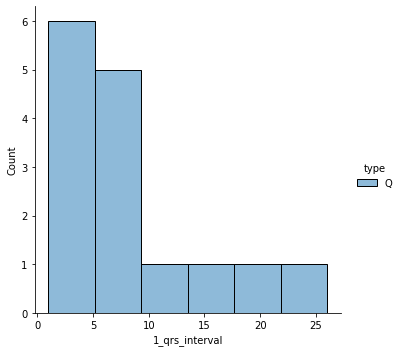

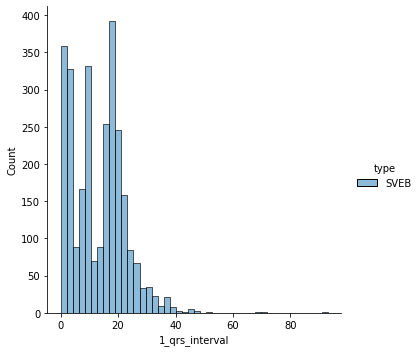

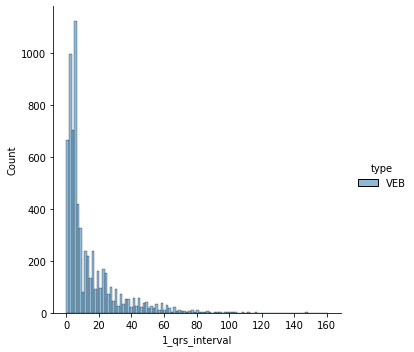

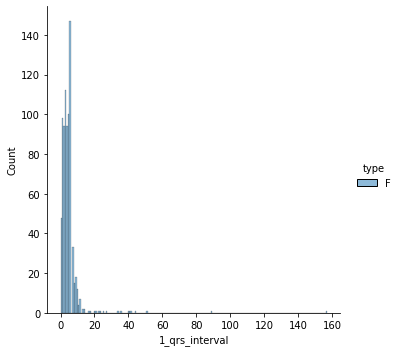

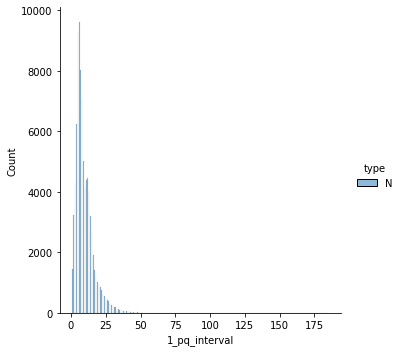

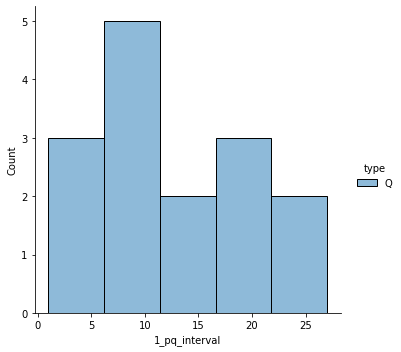

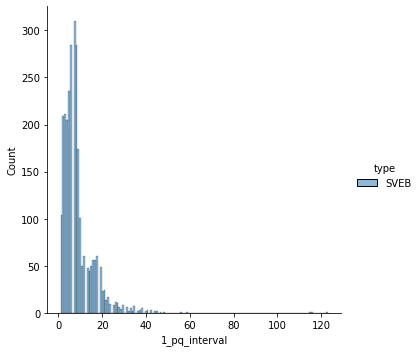

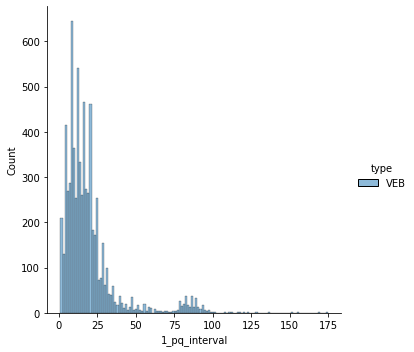

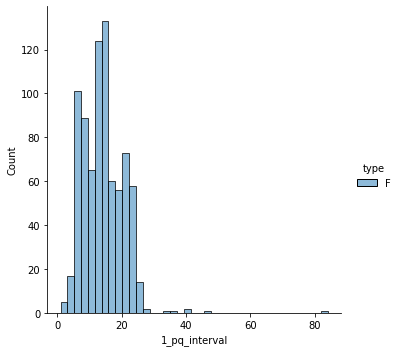

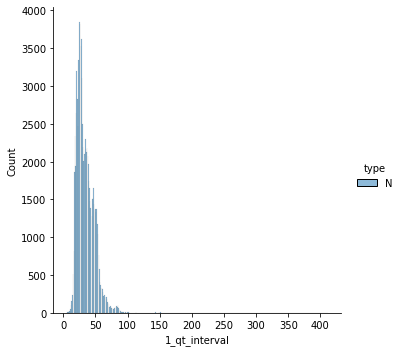

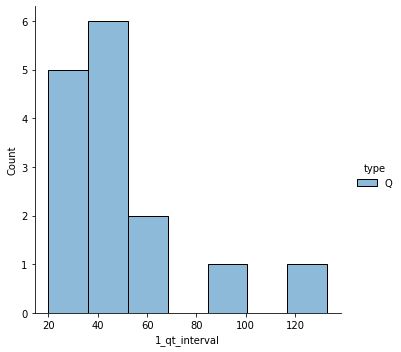

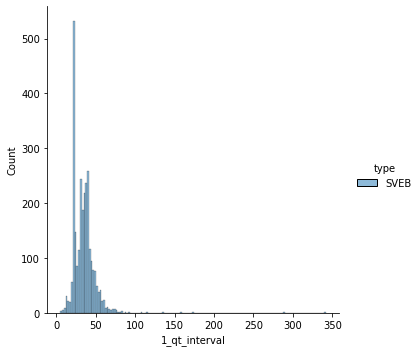

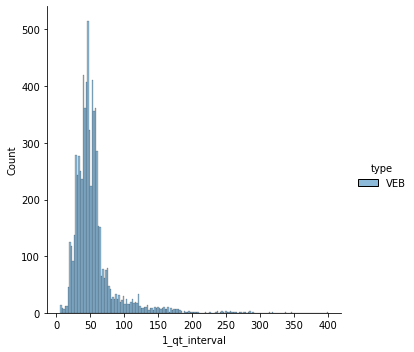

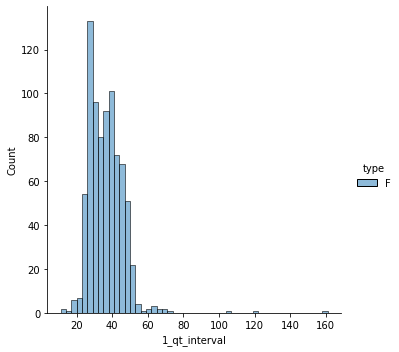

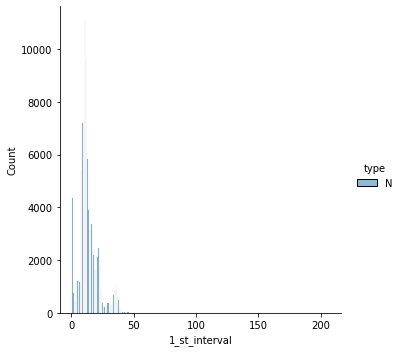

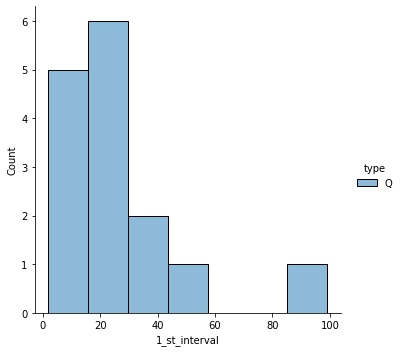

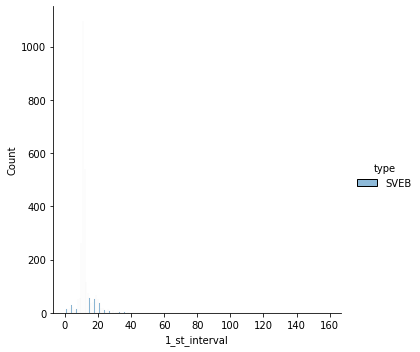

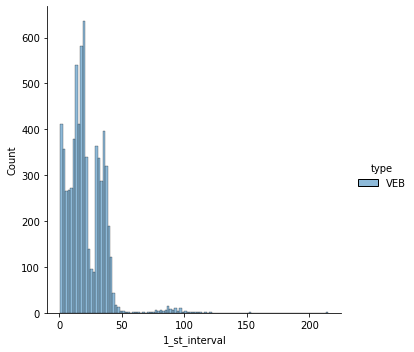

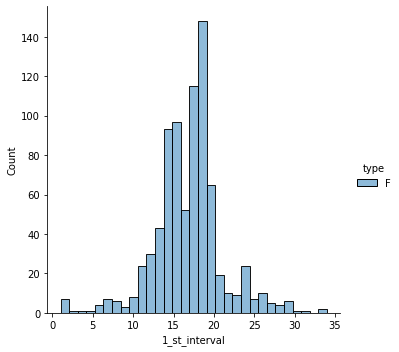

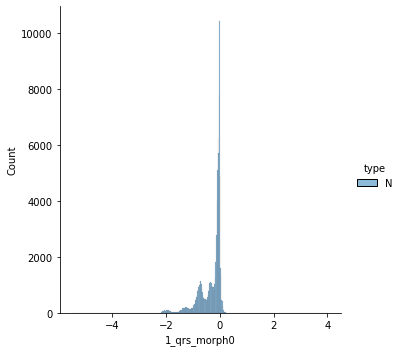

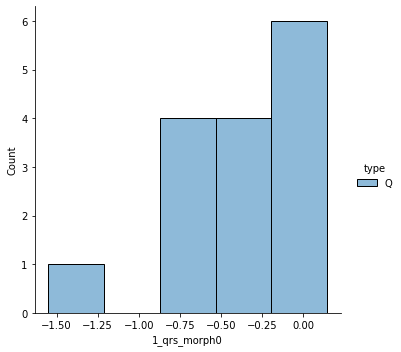

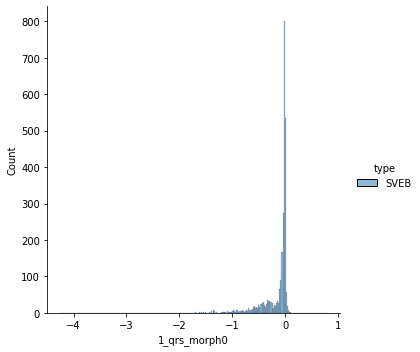

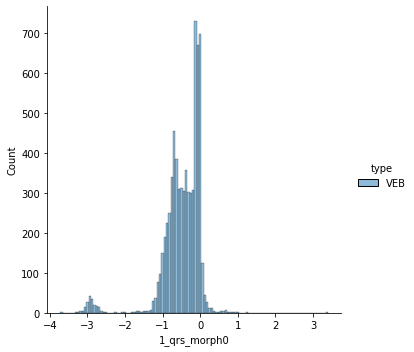

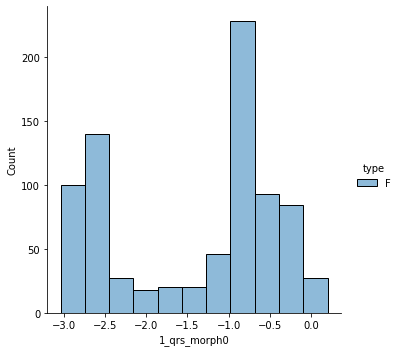

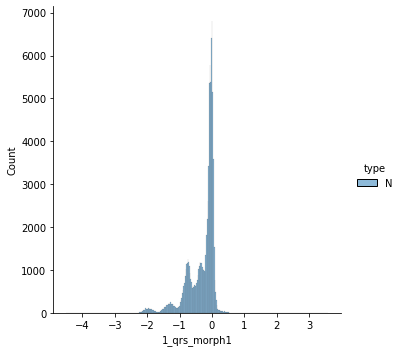

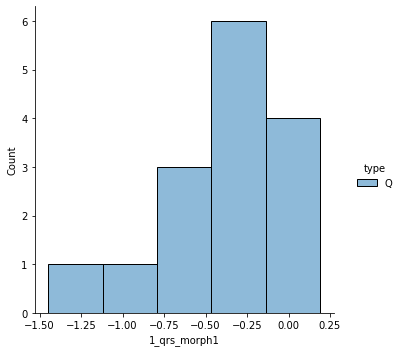

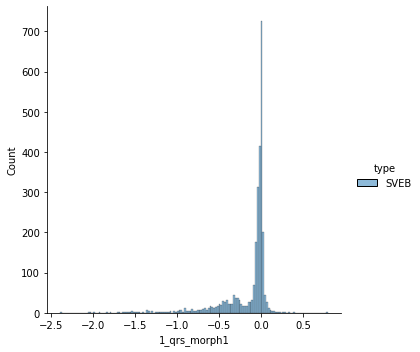

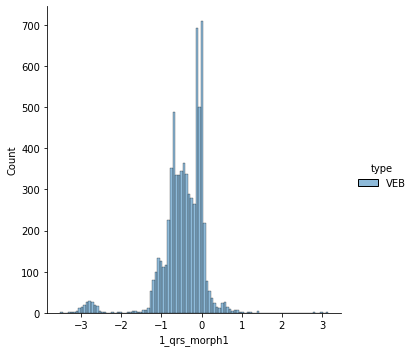

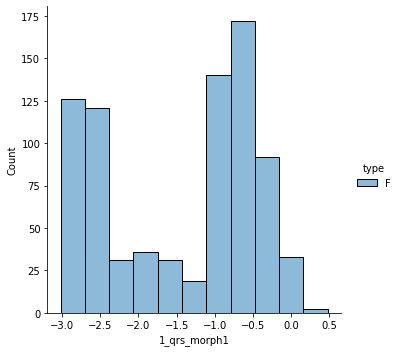

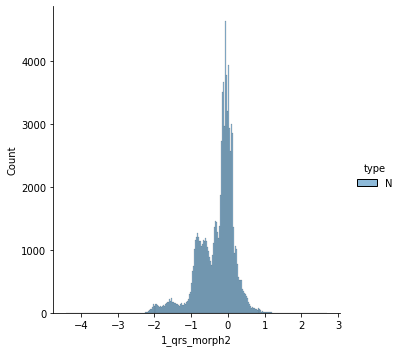

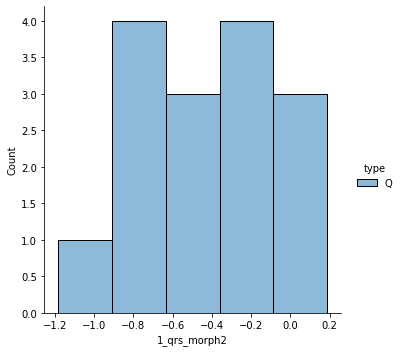

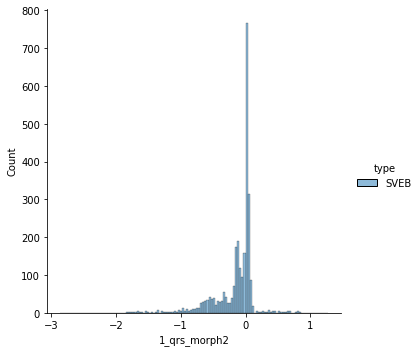

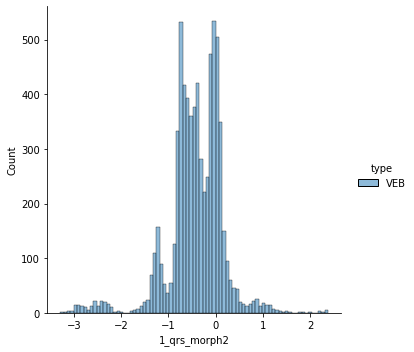

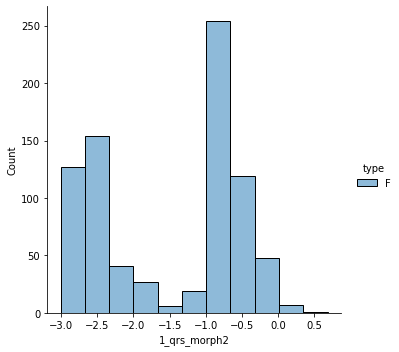

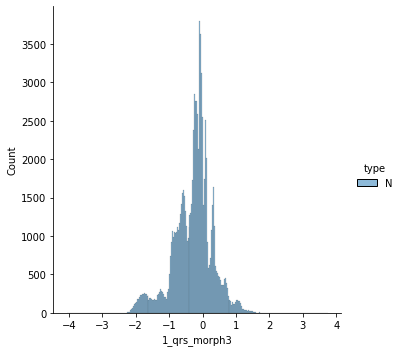

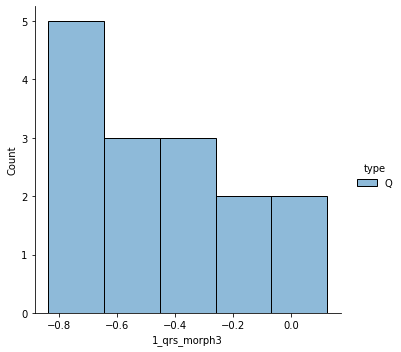

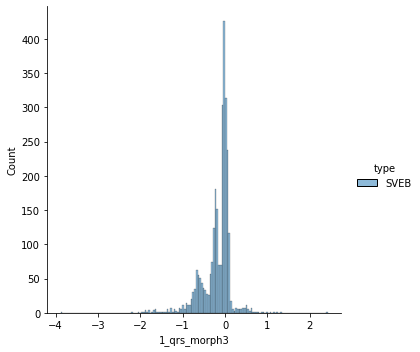

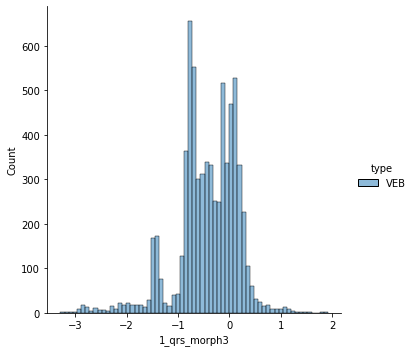

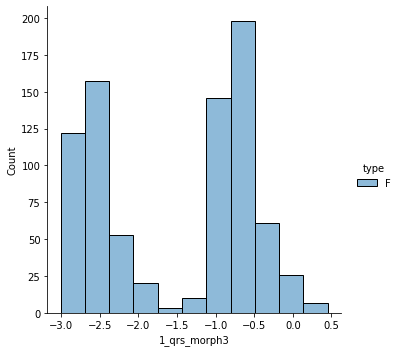

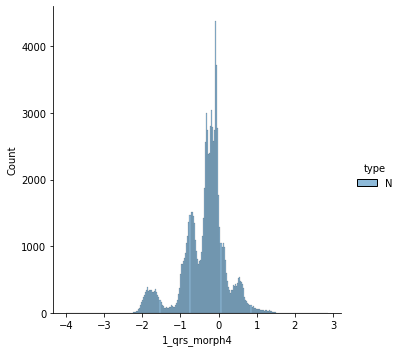

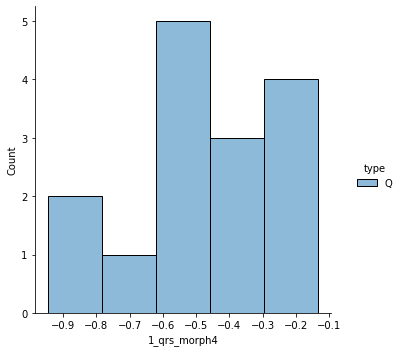

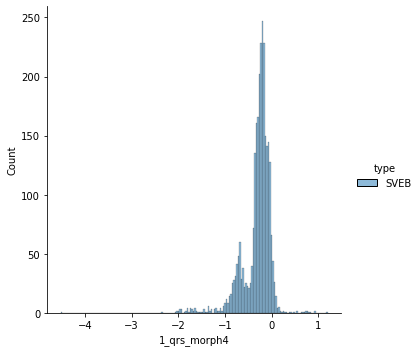

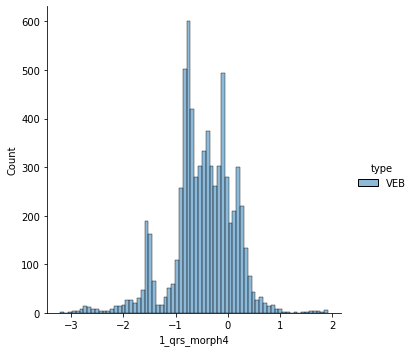

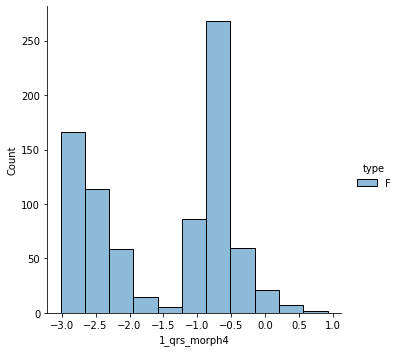

In [158]:
warnings.filterwarnings('ignore')
for i in range(33):
    for j in range(cls.shape[0]):
        ax = sns.displot(data[data['type'] == cls[j]], x=features[i], hue='type')

# Второй пункт 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
max_depth = 3
train_data, test_data = train_test_split(data, test_size = 0.2)
train_target = train_data['type']
test_target = test_data['type']
train_data.drop('type', axis=1, inplace=True)
test_data.drop('type', axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

In [13]:
dec_tree = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
dec_tree.fit(train_data,train_target)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
export_graphviz(dec_tree, feature_names=features, out_file='small_tree.dot', filled=True)

In [15]:
print(export_text(dec_tree))

|--- feature_1 <= 214.50
|   |--- feature_2 <= 233.50
|   |   |--- feature_26 <= 36.50
|   |   |   |--- class: N
|   |   |--- feature_26 >  36.50
|   |   |   |--- class: N
|   |--- feature_2 >  233.50
|   |   |--- feature_6 <= -1.12
|   |   |   |--- class: VEB
|   |   |--- feature_6 >  -1.12
|   |   |   |--- class: VEB
|--- feature_1 >  214.50
|   |--- feature_0 <= 231.50
|   |   |--- feature_1 <= 239.50
|   |   |   |--- class: N
|   |   |--- feature_1 >  239.50
|   |   |   |--- class: N
|   |--- feature_0 >  231.50
|   |   |--- feature_2 <= 252.50
|   |   |   |--- class: N
|   |   |--- feature_2 >  252.50
|   |   |   |--- class: SVEB



### Логические правила

1.  ('0_pre-RR' <= 214.5) & ('0_post-RR' <= 233.5) & ( $\forall$ '1_qt_interval') $\rightarrow$ class = 'N'

2. ('0_pre-RR' <= 214.5) & ('0_post-RR' > 233.5) & ( $\forall$ '0_sPeak') $\rightarrow$ class = 'VEB'

3. ('0_pre-RR' > 214.5) & ('record' <= 231.5) $\rightarrow$ class = 'N'

4. ('0_pre-RR' > 214.5) & ('record' > 231.5) & ('0_post-RR' <= 252.5) $\rightarrow$ class = 'N'

5. ('0_pre-RR' > 214.5) & ('record' > 231.5) & ('0_post-RR' > 252.5) $\rightarrow$ class = 'SVEB'

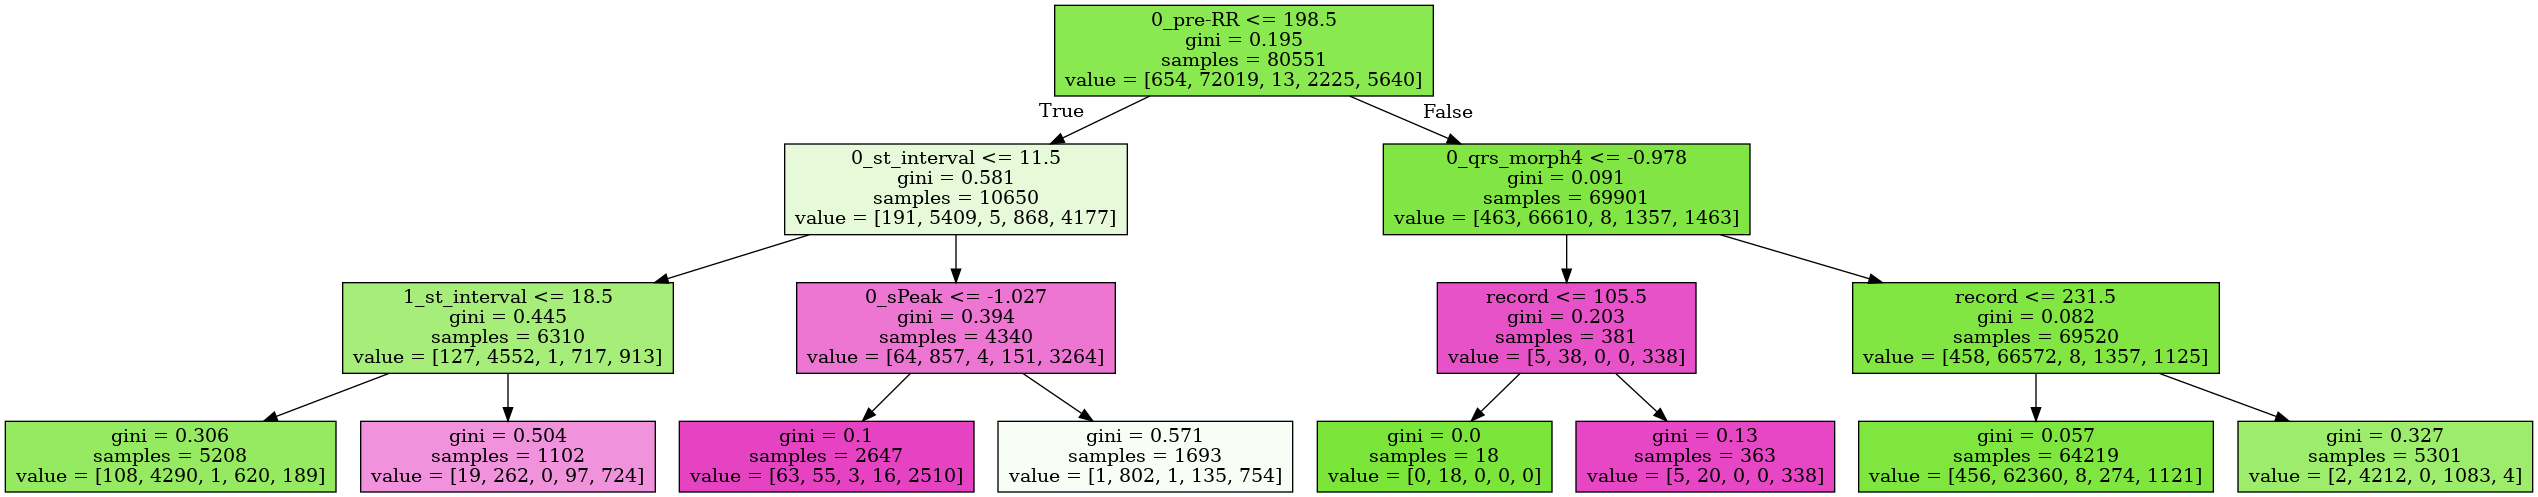

In [41]:
print('Accuracy test = ',accuracy_score(test_target, dec_tree.predict(test_data)))

Accuracy test =  0.9344026219088291


In [42]:
print('Accuracy train = ',accuracy_score(train_target, dec_tree.predict(train_data)))

Accuracy train =  0.9342404191133568


In [77]:
dec_tree.fit(train_data.drop('record', axis=1), train_target)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [69]:
accuracy_score(test_target, dec_tree.predict(test_data.drop('record',axis=1)))

0.9249677227132784

In [73]:
export_graphviz(dec_tree, feature_names=features.drop('record'), out_file='small_tree.dot', filled=True)

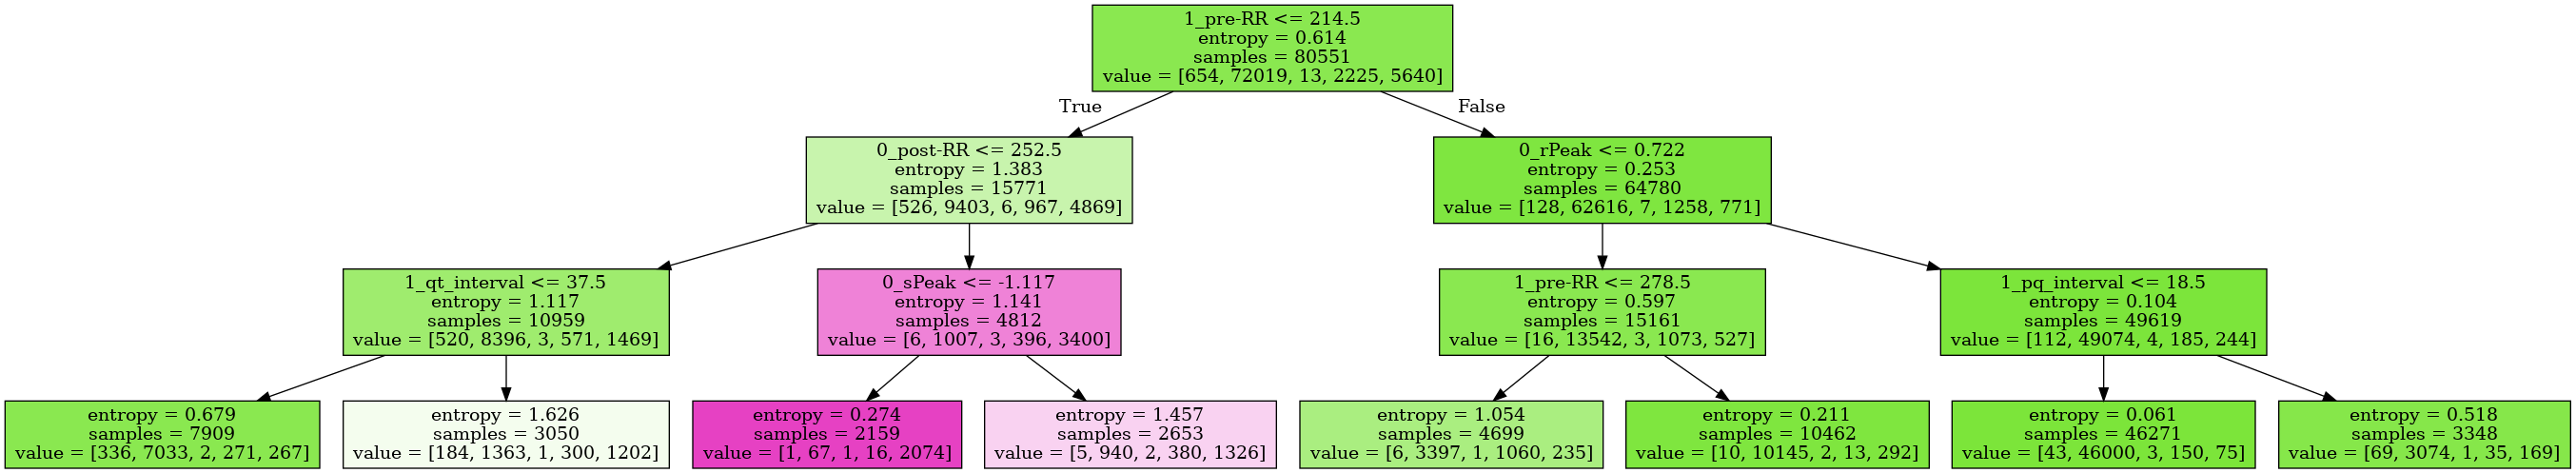

In [78]:
print(export_text(dec_tree))

|--- feature_16 <= 214.50
|   |--- feature_1 <= 252.50
|   |   |--- feature_25 <= 37.50
|   |   |   |--- class: N
|   |   |--- feature_25 >  37.50
|   |   |   |--- class: N
|   |--- feature_1 >  252.50
|   |   |--- feature_5 <= -1.12
|   |   |   |--- class: VEB
|   |   |--- feature_5 >  -1.12
|   |   |   |--- class: VEB
|--- feature_16 >  214.50
|   |--- feature_4 <= 0.72
|   |   |--- feature_0 <= 278.50
|   |   |   |--- class: N
|   |   |--- feature_0 >  278.50
|   |   |   |--- class: N
|   |--- feature_4 >  0.72
|   |   |--- feature_24 <= 18.50
|   |   |   |--- class: N
|   |   |--- feature_24 >  18.50
|   |   |   |--- class: N



### Логические правила (без признака `record`)

1. ('0_qrs_morph4' <= 214.5) & ('0_pre-RR' <= 252.5) ( $\forall$ '1_pq_interval') $\rightarrow$ class = 'N'

2. ('0_qrs_morph4' <= 214.5) & ('0_pre-RR' > 252.5) ( $\forall$ '0_rPeak') $\rightarrow$ class = 'VEB'

3. ('0_qrs_morph4' > 214.5) & ( $\forall$ '0_tPeak') $\rightarrow$ class = 'N'

In [27]:
features[4]

'0_tPeak'

# Третий пункт 

In [18]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [192]:
tree_param = {'max_depth': range(3,15)}

In [193]:
tree_grid = GridSearchCV(dec_tree, tree_param,
cv=5, n_jobs=-1,
verbose=True)

In [194]:
tree_grid.fit(train_data,train_target)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             n_jobs=-1, param_grid={'max_depth': range(3, 15)}, verbose=True)

In [195]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 13}, 0.9819865727450017)

In [196]:
accuracy_score(test_target, tree_grid.predict(test_data))

0.9833151256331314

In [21]:
target = data['type']

Best accuracy on CV is 98.12% with 21 max_depth


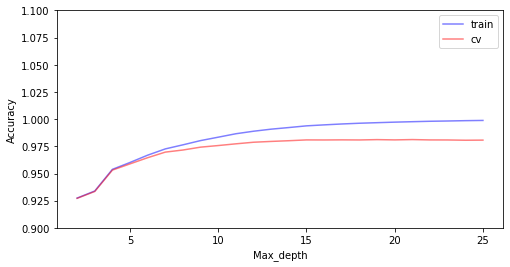

In [200]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

for max_depth_2 in max_depth_grid:
    tree = DecisionTreeClassifier(max_depth=max_depth_2, random_state=7)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(data[features], target):
        X_train, X_test = data[features].iloc[train_index], data[features].iloc[test_index]
        y_train, y_test = target[train_index], target[test_index]
        tree.fit(X_train, y_train)
        temp_train_acc.append(tree.score(X_train, y_train))
        temp_test_acc.append(tree.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.9,1.1])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

# Четвертый пункт 

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

Best accuracy on CV is 96.98% with 49 n_estimators


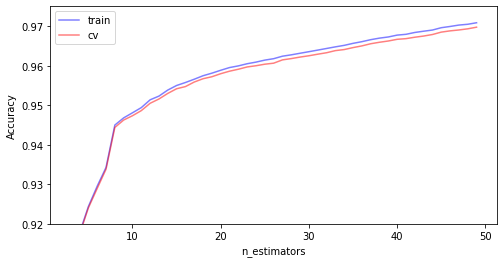

In [72]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
n_estimators_grid = []
for i in range(3, 50):
    n_estimators_grid+=[i]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

for n_estimators in n_estimators_grid:
    rfc = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=2, random_state=7)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(data[features], target):
        X_train, X_test = data[features].iloc[train_index], data[features].iloc[test_index]
        y_train, y_test = target[train_index], target[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} n_estimators".format(max(test_acc.mean(axis=1))*100, 
                                                        n_estimators_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(n_estimators_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(n_estimators_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.92,0.975])
ax.set_ylabel("Accuracy")
ax.set_xlabel("n_estimators");

#### `Выводы по 4 пункту:`
1. по сравнению с моделью в прошлом пункте градиентный бустинг показывает результат хуже, что может быть связано с данными 
2. на кросс-валидации лучшим гиперпараметром является 49, что довольно логично(с каждой итерацией улучшаем модель)
3. множество признаков, вносивших наибольший вклад в модель, совпадает с множеством в прошлой модели

# Пятый пункт

In [1]:
from sklearn.ensemble import RandomForestClassifier

Best accuracy on CV is 92.21% with 11 n_estimators


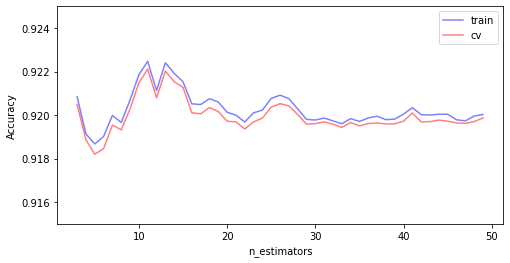

In [23]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
n_estimators_grid = []
for i in range(3,50):
    n_estimators_grid+=[i]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Обучаем на тренировочном датасете
for n_estimators in n_estimators_grid:
    rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=3, random_state=7, n_jobs=-1)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(data[features], target):
        X_train, X_test = data[features].iloc[train_index], data[features].iloc[test_index]
        y_train, y_test = target[train_index], target[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} n_estimators".format(max(test_acc.mean(axis=1))*100, 
                                                        n_estimators_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(n_estimators_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(n_estimators_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
#ax.fill_between(max_leaf_nodes_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
#ax.fill_between(max_leaf_nodes_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.915,0.925])
ax.set_ylabel("Accuracy")
ax.set_xlabel("n_estimators");

#### `Выводы по 5 пункту:`
1. случайный лес оказался худшей моделью из используемых
2. лучшим параметром является 11
3. множество признаков не изменилось